## Import libraries

In [2]:
from arcgis.gis import GIS

## Connect to _source_ and _target_ GIS organizations

In [3]:
source = GIS(profile="clone-starter", verify_cert=False)
target = GIS(profile="clone-terminator", verify_cert=False)

In [ ]:
print(source)

In [5]:
source.users.me.username

'clonerator'

In [ ]:
print(target)

In [7]:
target.users.me.username

'clonebeliever'

## Search for a _Feature Layer_ to clone

In [8]:
comm_coll_items = source.content.search(query="community_college_district_2", 
                                        item_type="Feature Layer")
comm_coll_items

[<Item title:"community_college_district_2" type:Feature Layer Collection owner:clonerator>]

<Item title:"community_college_district_2" type:Feature Layer Collection owner:clonerator>
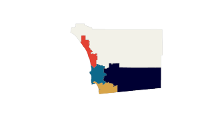

In [9]:
comm_coll_flyr_item = comm_coll_items[0]
comm_coll_flyr_item

### Print information about the _Feature Layer_

In [10]:
print(f"{'Hosted Feature Layer:':35}{comm_coll_flyr_item.title}\n{'-'*80}")
print(f"{' '*2}{'item id:':20}{comm_coll_flyr_item.id}")
print(f"{' '*2}individual layer urls:")
for flyr in comm_coll_flyr_item.layers:
    print(f"{' '*4}{flyr.url}")

Hosted Feature Layer:              community_college_district_2
--------------------------------------------------------------------------------
  item id:            38a23837eeac4c81b4f4283967161c01
  individual layer urls:
    https://nbs1.dev.geocloud.com/server/rest/services/Hosted/community_college_district_2/FeatureServer/0


### Visualize the _Feature Layer_

In [11]:
map1 = source.map("San Diego County, CA")
map1.add_layer(comm_coll_flyr_item)
map1

MapView(layout=Layout(height='400px', width='100%'))

## Clone the _Feature Layer_

In [12]:
try:
    cloned_flyr_item = target.content.clone_items(items=[comm_coll_flyr_item],
                                  folder="Community College Admin")[0]
except Exception as e:
    print("Failed to clone.")
    print(str(e))

### Print information about the cloned _Feature Layer_

In [13]:
print(f"{'Hosted Feature Layer:':35}{cloned_flyr_item.title}\n{'-'*80}")
print(f"{' '*2}{'item id:':20}{cloned_flyr_item.id}")
print(f"{' '*2}individual layer urls:")
for flyr in cloned_flyr_item.layers:
    print(f"{' '*4}{flyr.url}")

Hosted Feature Layer:              community_college_district_2
--------------------------------------------------------------------------------
  item id:            009f1c6bdb0e4cbcbae91799c6759839
  individual layer urls:
    https://nbs2.dev.geocloud.com/server/rest/services/Hosted/community_college_district_2/FeatureServer/0


### Visualize the cloned _Feature Layer_

In [14]:
map2 = target.map("San Diego County, CA")
map2.add_layer(cloned_flyr_item)
map2

MapView(layout=Layout(height='400px', width='100%'))